In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df=pd.read_excel('./Online_Retail.xlsx', sheet_name = 'Online Retail')
df.head()
# reading the data file (excel) and display the first 5 rows with the head() command

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [107]:
year_df = df[df['InvoiceDate'] < pd.Timestamp('2011-12-01')]
year_df.head()
# selecting records for only 1 year from 2010-12-01 to 2011-12-01



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [108]:
year_df.isna().sum()
# to check how many null cells there are in the data frame

InvoiceNo           0
StockCode           0
Description      1439
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     127216
Country             0
dtype: int64

In [109]:
year_df['CustomerID']=year_df['CustomerID'].fillna(99999)
year_df['CustomerID']=year_df['CustomerID'].astype(int)
# fill Customer ID of empty fields with 99999 and treat them as integer so they do not display .0 


C:\Users\laval.liu.RHOL\AppData\Local\Temp\ipykernel_4032\3334260514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['CustomerID']=year_df['CustomerID'].fillna(99999)
C:\Users\laval.liu.RHOL\AppData\Local\Temp\ipykernel_4032\3334260514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['CustomerID']=year_df['CustomerID'].astype(int)


In [110]:
#SOME DESCRIPTION are EMPTY FILLING THEM FROM (similar) STOCK CODE WHICH HAVE DESCRIPTION
description_dict = year_df.dropna().set_index('StockCode')['Description'].to_dict()
year_df['Description']=year_df['StockCode'].map(description_dict).fillna(year_df['Description'])


C:\Users\laval.liu.RHOL\AppData\Local\Temp\ipykernel_4032\590873696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['Description']=year_df['StockCode'].map(description_dict).fillna(year_df['Description'])


In [111]:
# data cleansing by removing below
# stock code = S for samples
# stock code = POST for POSTAGE
# stock code = DOT for Dot com postage
# stock code = B for Adjust bad debts
# stock code = C2 for carriage
# stock code = MBANK CHARGES for BANK CHARGES
# stock code = AMAZON FEE for AMAZON FEE
# stock code = CRUK for CRUK COMMISSION
# description = throw away
# description = unsaleable, destroyed
# description = damages
# unit price = 0

year_df = year_df.drop(year_df[(year_df['StockCode'] == 'S') | (year_df['StockCode'] == 'BANK CHARGES') | (year_df['StockCode'] == 'DOT') | (year_df['UnitPrice'] == 0) | (year_df['StockCode'] == 'POST') | (year_df['StockCode'] == 'throw away') | (year_df['StockCode'] == 'CRUK') | (year_df['StockCode'] == 'C2') | (year_df['StockCode'] == 'BANK CHARGES') | (year_df['StockCode'] == 'AMAZON FEE')| (year_df['StockCode'] == 'damages') | (year_df['StockCode'] == 'B') | (year_df['StockCode'] == 'POST')].index)
year_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE MOROCCAN METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [112]:
year_df.isna().sum()
# checking for empty cells after data preparation

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [113]:
year_df['Tot_amount'] = year_df['Quantity'] * year_df['UnitPrice']
year_df.head()
# create an additional column 'Tot_amount' which is the product of columns 'Quantity' and 'UnitPrice'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Tot_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE MOROCCAN METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [114]:
df2=year_df[['InvoiceDate', 'Tot_amount']]
df2.head()

,InvoiceDate,Tot_amount
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34


In [115]:
df2['InvoiceDate'].min(), df2['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-11-30 17:42:00'))

In [116]:
train_start = pd.to_datetime('2010-12-01')
train_end = pd.to_datetime('2011-09-01')

test_start = pd.to_datetime('2011-09-01')
test_end = pd.to_datetime('2011-11-30')

forecast_start = pd.to_datetime('2011-12-01')
forecast_end = pd.to_datetime('2012-02-01')

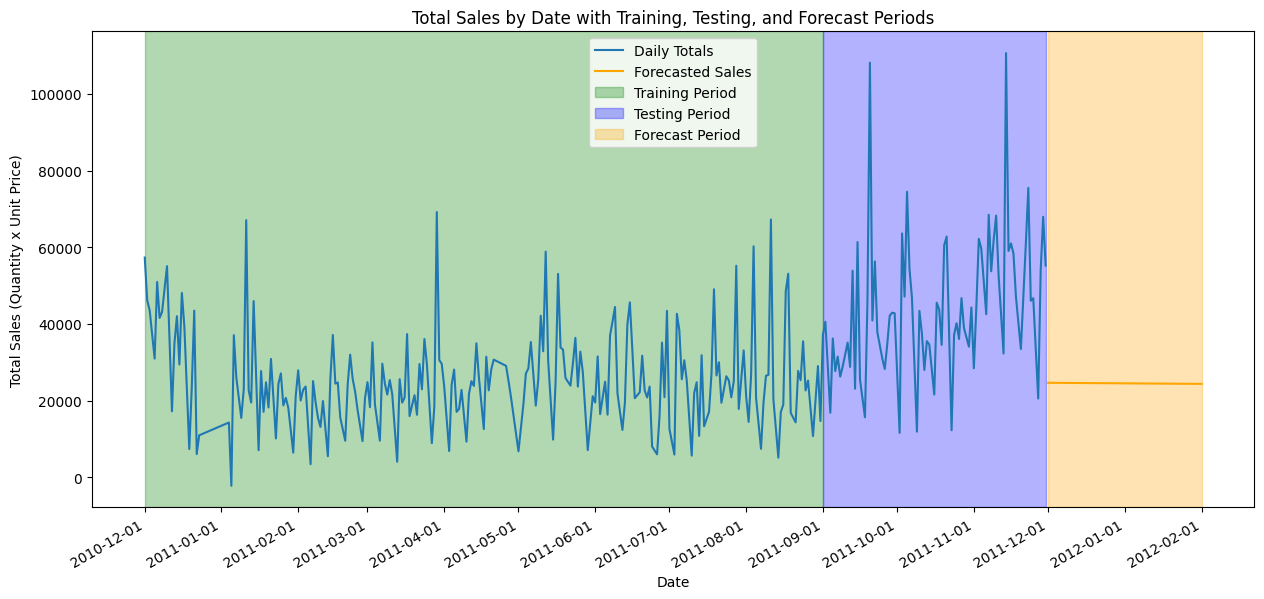

In [129]:
# Your initial data processing
df2.loc[:, 'InvoiceDate'] = pd.to_datetime(df2.loc[:, 'InvoiceDate']).dt.normalize()
daily_totals = df2.groupby('InvoiceDate')['Tot_amount'].sum().reset_index()
daily_totals.set_index('InvoiceDate', inplace=True)
daily_totals.sort_index(inplace=True)

# Convert index to numerical format for regression model
daily_totals['Date_Num'] = daily_totals.index.map(mdates.date2num)

# Define training period
train_start = pd.to_datetime('2010-12-01')
train_end = pd.to_datetime('2011-09-01')

# Create a copy of the training data to avoid SettingWithCopyWarning
train_data = daily_totals.loc[train_start:train_end].copy()

# Split your data into training and testing sets
X = daily_totals[['Date_Num']]
Y = daily_totals['Tot_amount']
X_train = train_data[['Date_Num']].to_numpy()
y_train = train_data['Tot_amount'].to_numpy()

# Define testing period
test_start = pd.to_datetime('2011-09-01')
test_end = pd.to_datetime('2011-11-30')
test_data = daily_totals.loc[test_start:test_end]
X_test = test_data[['Date_Num']]
y_test = test_data['Tot_amount']

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future sales
forecast_start = pd.to_datetime('2011-12-01')
forecast_end = pd.to_datetime('2012-02-01')
future_dates = pd.date_range(start=forecast_start, end=forecast_end)
future_dates_num = mdates.date2num(future_dates)
future_predictions = model.predict(future_dates_num.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(15, 7))
plt.plot(daily_totals.index, daily_totals['Tot_amount'], linestyle='-', label='Daily Totals')
plt.plot(future_dates, future_predictions, linestyle='-', color='orange', label='Forecasted Sales')
plt.axvspan(train_start, train_end, color='green', alpha=0.3, label='Training Period')
plt.axvspan(test_start, test_end, color='blue', alpha=0.3, label='Testing Period')
plt.axvspan(forecast_start, forecast_end, color='orange', alpha=0.3, label='Forecast Period')

# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.title('Total Sales by Date with Training, Testing, and Forecast Periods')
plt.xlabel('Date')
plt.ylabel('Total Sales (Quantity x Unit Price)')
plt.legend()
plt.show()

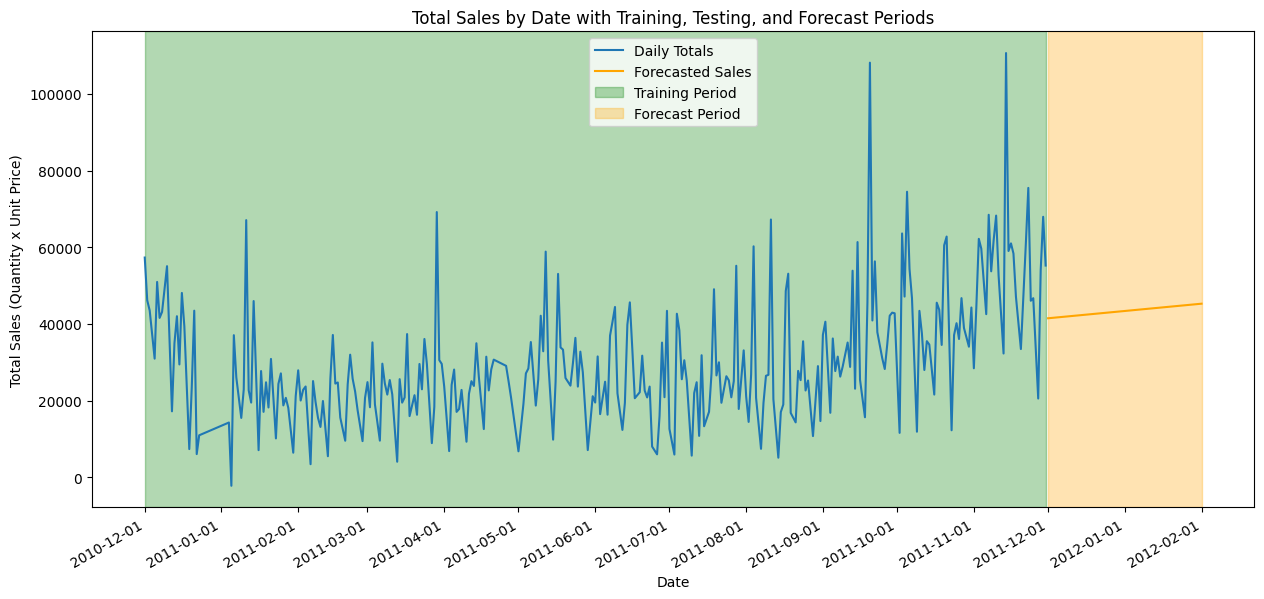

In [130]:
# Your initial data processing
df2.loc[:, 'InvoiceDate'] = pd.to_datetime(df2.loc[:, 'InvoiceDate']).dt.normalize()
daily_totals = df2.groupby('InvoiceDate')['Tot_amount'].sum().reset_index()
daily_totals.set_index('InvoiceDate', inplace=True)
daily_totals.sort_index(inplace=True)

# Convert index to numerical format for regression model
daily_totals['Date_Num'] = daily_totals.index.map(mdates.date2num)

# Define training period
train_start = pd.to_datetime('2010-12-01')
train_end = pd.to_datetime('2011-11-30')

# Create a copy of the training data to avoid SettingWithCopyWarning
train_data = daily_totals.loc[train_start:train_end].copy()

# Split your data into training and testing sets
X = daily_totals[['Date_Num']]
Y = daily_totals['Tot_amount']
X_train = train_data[['Date_Num']].to_numpy()
y_train = train_data['Tot_amount'].to_numpy()

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future sales
forecast_start = pd.to_datetime('2011-12-01')
forecast_end = pd.to_datetime('2012-02-01')
future_dates = pd.date_range(start=forecast_start, end=forecast_end)
future_dates_num = mdates.date2num(future_dates)
future_predictions = model.predict(future_dates_num.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(15, 7))
plt.plot(daily_totals.index, daily_totals['Tot_amount'], linestyle='-', label='Daily Totals')
plt.plot(future_dates, future_predictions, linestyle='-', color='orange', label='Forecasted Sales')
plt.axvspan(train_start, train_end, color='green', alpha=0.3, label='Training Period')
plt.axvspan(forecast_start, forecast_end, color='orange', alpha=0.3, label='Forecast Period')

# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.title('Total Sales by Date with Training, Testing, and Forecast Periods')
plt.xlabel('Date')
plt.ylabel('Total Sales (Quantity x Unit Price)')
plt.legend()
plt.show()

In [118]:
# total sales per month
year_df.groupby(year_df.InvoiceDate.dt.month)['Tot_amount'].sum()


InvoiceDate
1      541985.000
2      486523.690
3      666051.810
4      482446.051
5      708771.500
6      674987.600
7      662801.751
8      676381.770
9      999522.611
10    1047506.500
11    1418160.000
12     720412.080
Name: Tot_amount, dtype: float64

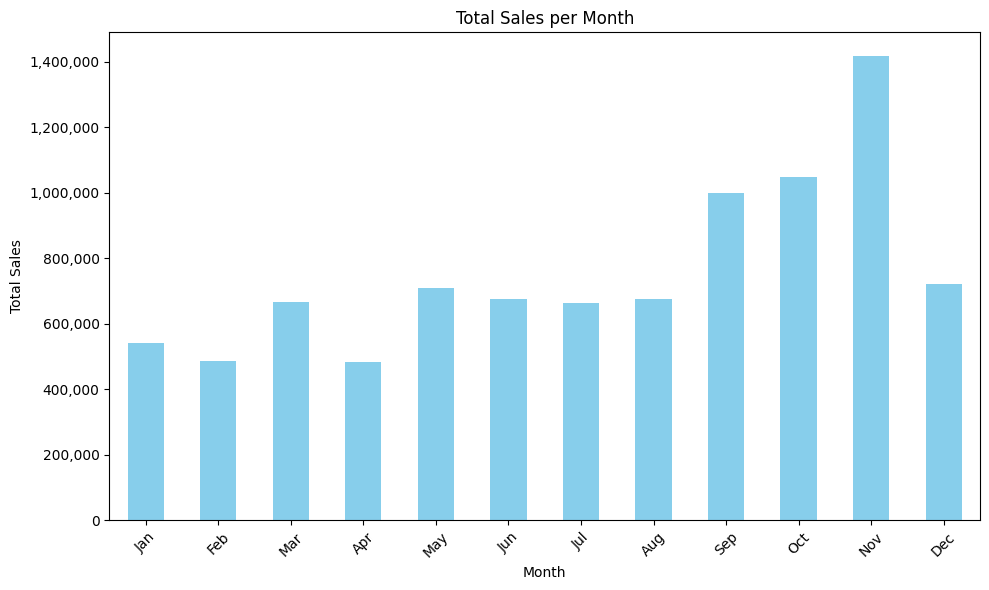

In [119]:
# graph of total sales by Month
monthly_totals = year_df.groupby(year_df.InvoiceDate.dt.month)['Tot_amount'].sum()
monthly_totals.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

#set y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


In [120]:
# total sales by country
year_df.groupby('Country')['Tot_amount'].sum()

Country
Australia                136990.000
Austria                    8175.120
Bahrain                     548.400
Belgium                   35382.530
Brazil                     1143.600
Canada                     3115.440
Channel Islands           19742.140
Cyprus                    13022.540
Czech Republic              671.720
Denmark                   17891.240
EIRE                     250978.780
European Community         1150.750
Finland                   17784.060
France                   175806.070
Germany                  194032.510
Greece                     3879.530
Hong Kong                  9942.040
Iceland                    4085.180
Israel                     7907.820
Italy                     15045.060
Japan                     35457.550
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2011.280
Netherlands              271439.520
Norway                    29547.260
Poland                     6853.140
Portugal            

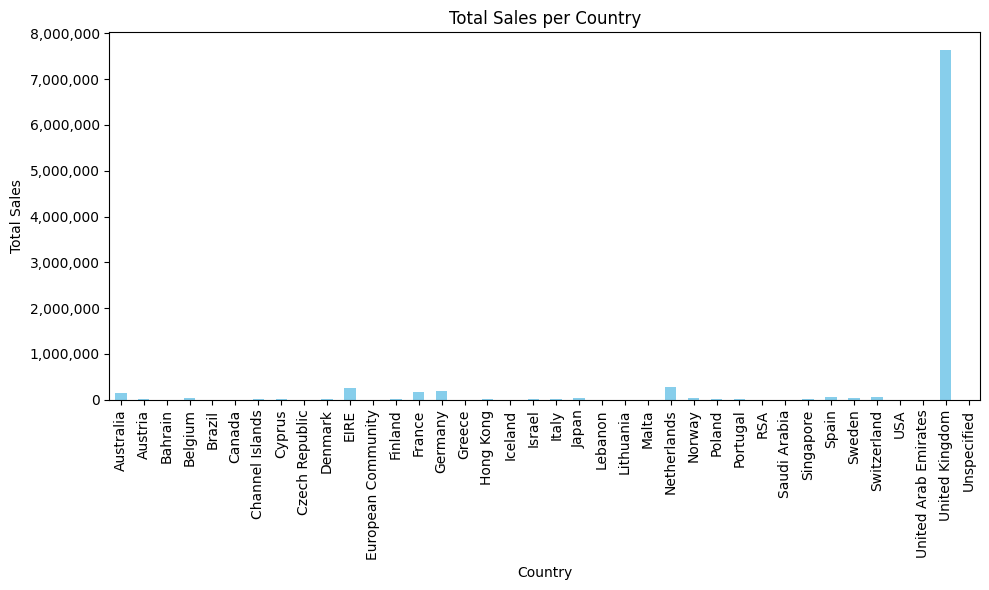

In [127]:
# graph of total sales by country
country_totals = year_df.groupby('Country')['Tot_amount'].sum()
country_totals.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Total Sales per Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')

#set y-axis
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [122]:
df_orders = year_df.groupby('InvoiceNo').agg(
        TotalValue=('Tot_amount', 'sum'),
        StockCodes=('StockCode', 'nunique'),
        items=('Quantity', 'sum')
)
df_orders.head()
# total sales by Invoice No, the total number of items per Invoice No and the Total number of unique items per Invoice No

,TotalValue,StockCodes,items
InvoiceNo,,,
536365,139.12,7,40
536366,22.20,2,12
536367,278.73,12,83
536368,70.05,4,15
536369,17.85,1,3


In [123]:
df_StockCode = year_df.groupby(['StockCode', 'Description']).agg(
        TotalValue=('Tot_amount', 'sum'),
        items=('Quantity', 'sum')
)
df_StockCode.head()
# total sales by Stock Code with the Description, the total number of items per Stock Code 

,,TotalValue,items
StockCode,Description,,
10002,INFLATABLE POLITICAL GLOBE,759.89,860
10080,GROOVY CACTUS INFLATABLE,119.09,303
10120,DOGGY RUBBER,39.27,187
10125,MINI FUNKY DESIGN TAPES,972.74,1270
10133,COLOURING PENCILS BROWN TUBE,1540.02,2857


In [124]:
df_TotSalesCustomer = year_df.groupby('CustomerID').agg(
        TotalValue=('Tot_amount', 'sum'),
        StockCodes=('StockCode', 'nunique'),
        items=('Quantity', 'sum')
)
df_TotSalesCustomer.head()
# total sales per customer, with the total number of items they purchased and the number of unique items they purchased

,TotalValue,StockCodes,items
CustomerID,,,
12346,0.00,1,0
12347,4085.18,100,2266
12348,1437.24,21,2332
12349,1457.55,72,630
12350,294.40,16,196
